<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Sebastian!

I'm happy to review your project today  🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
    <div class="alert alert-info"> <b>Student comments:</b> </div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 

 
Hello Sebastian, another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.
    
Overall, well done! I can see that a lot of effort has been put in. Your project already looks really good, and you've achieved impressive results.

You’ll find specific feedback in the notebook under the **Reviewer's comment v1** sections.
    
❗ Let's go through the critical changes required so you can keep getting better as a data scientist:

- **Change the data type for `average_trips` column**
- **Check your dataframe before running a test for outliers**  An outlier can reduce the power of a test, making it more difficult to detect meaningful changes. They can also mess up the results—whichever variant the “whale” (user with a really big value) lands can appear to be the winner. There are two techniques for dealing with outliers that are considered best practice: capping and CUPED. This article has a great discussion of the two methods - https://craft.faire.com/how-to-speed-up-your-a-b-test-outlier-capping-and-cuped-8c9df21c76b?gi=f1b21d4fbbb0
    
    
Feel free to ask questions or share thoughts in the comments 👋 - I'm here to help with those finishing touches.

And also remember you can always reach out to your tutor on Discord for additional support ⛑️

You're making excellent progress on your data science journey! 🚀 You're almost there!
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for going an extra mile and making great changes in your project.

Now everything is perfect. No critial issues left, so your project has been accepted!
    
Wish you cool projects in the next sprints! ☘️   

# Project Description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks 👏

In [1]:
# Loading all the libraries

from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from functools import reduce
import pandas as pd
import numpy as np

In [2]:
# Load the data files into different DataFrames

taxi_df = pd.read_csv('/datasets/project_sql_result_01.csv')
trips_df = pd.read_csv('/datasets/project_sql_result_04.csv')
trips_weather_df = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
display(taxi_df)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
display(trips_df)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [5]:
display(trips_weather_df)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


# Preparing Data for Analysis (Data Cleaning)

In [6]:
#Checkin the general information of both DataFrames 
print(taxi_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [7]:
print(trips_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [8]:
#Checkin the general information of both DataFrames 
print(trips_weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [9]:
# Checking for duplicate values

print(taxi_df.duplicated().sum())

0


In [10]:
# Checking for duplicate values

print(trips_df.duplicated().sum())

0


In [11]:
# Checking for duplicate values

print(trips_weather_df.duplicated().sum())

197


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

I loaded all the libraries needed to exectute the project, loaded both data sets and checked the general information to see 
if there was any missing values, amaount of rows and columns, and the data types. Based on this, I can determine if changes in 
data types must be done or not and at last checked for duplicated values and found none in the first 2 data sets, the last one however <b>(trips_weather_df)</b> had 197 duplicate values which makes up for 18% of the total data.
    
</div>

In [12]:
trips_weather_df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [13]:
trips_weather_df = trips_weather_df.drop_duplicates()

In [14]:
trips_weather_df.duplicated().sum()

0

In [15]:
trips_weather_df.describe()

,duration_seconds
count,871.000000
mean,2096.308840
std,782.274717
min,0.000000
25%,1440.000000
50%,2015.000000
75%,2584.000000
max,7440.000000


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

I used <b>the describe()</b> method to get general statistics and compare using the method again after droping duplicate 
values and see if there is a significant difference in numbers and it could possible affect results or skew the data.
    
</div>

In [16]:
trips_weather_df['start_ts'] = pd.to_datetime(trips_weather_df['start_ts'])
print(trips_weather_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB
None


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you've checked data.

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>
    I converted the data type in the <b>start_ts</b> column of the <b>trips_weather_df</b> from object to datetime
    
</div>

In [17]:
trips_df['average_trips'] = trips_df['average_trips'].round().astype('Int64')

In [18]:
#Calculate the top 10 neighborhoods in terms of Dropoffs

top_10_neighborhoods = trips_df.sort_values(by='average_trips', ascending=False).head(10)
display(top_10_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


In [19]:
trips_weather_df['start_ts'] = pd.to_datetime(trips_weather_df['start_ts'])
print(trips_weather_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB
None


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
The `average_trips` column is currently a float, but it should be an integer since it represents the average number of trips. Could you please adjust its data type?

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>
    The correction was applied two cells above: The type of the <b>average_trips</b> column was changed from float64 to Int64  
    before calculating the top 10 neighborhoods
</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Nice! Saved some memory (not that it matters here) and it looks nicer 😇

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

For this step, I applied the <b>sort_values</b> method to the <b>average_trips</b> column, sorted in descending order and finally used head 10 to get the first 10 results (top 10). 
    
</div>

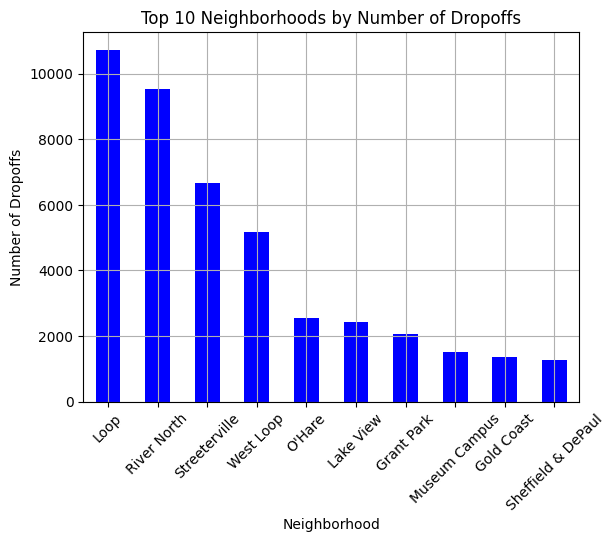

In [20]:
#Plot a graph to visualize the top 10 neighborhoods in terms of dropoffs

top_10_neighborhoods.plot(
    kind='bar', 
    x='dropoff_location_name', 
    y='average_trips', 
    legend=False, 
    color='blue'
)

plt.title('Top 10 Neighborhoods by Number of Dropoffs')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

The graphic visualizes the top 10 neighborhoods by the number of dropoffs to each one, Loop takes the number one spot with
over 10 thousand rides, Sheffield & DePaul is at the last spot with less than 1500 rides.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Well done! Everything is correct here. 



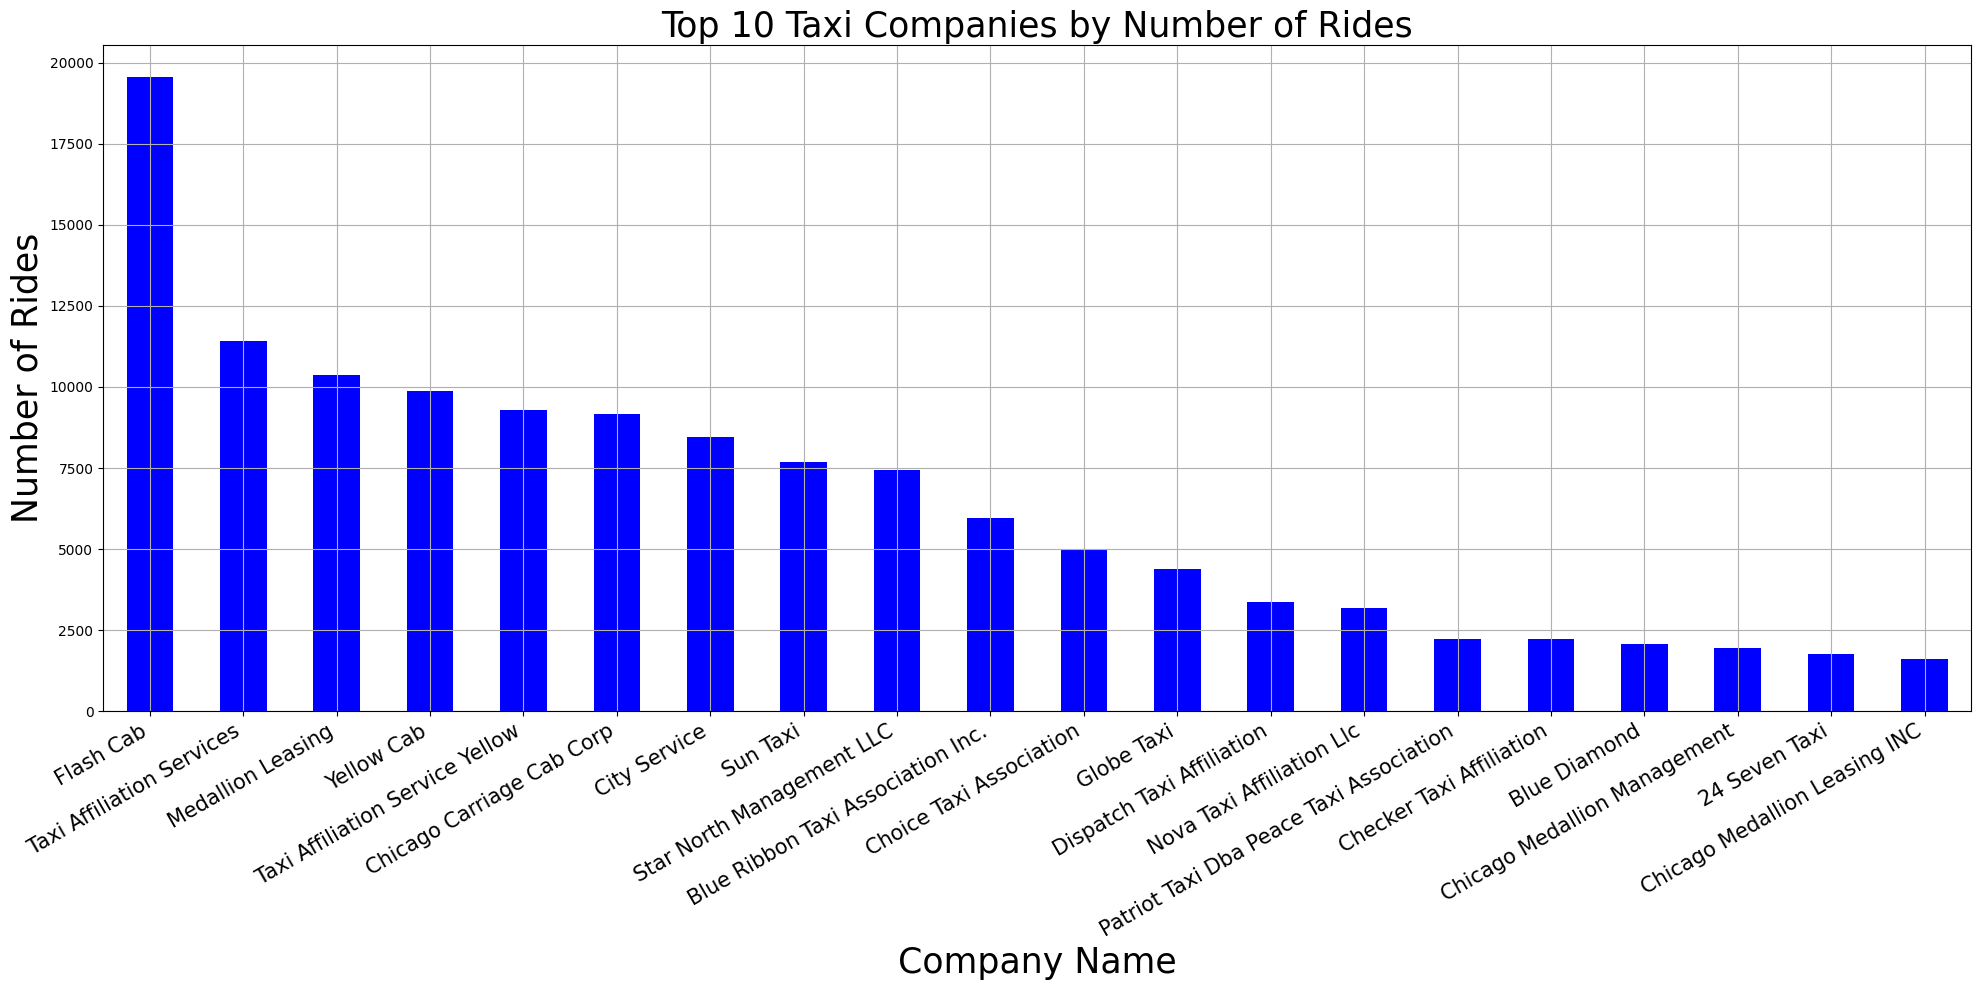

In [21]:
top_taxi_df = taxi_df.nlargest(20, 'trips_amount')
plt.figure(figsize=(20, 10))

top_taxi_df.plot(
    kind='bar',
    x='company_name',
    y='trips_amount',
    legend=False,
    color='blue',
    ax=plt.gca()
)

plt.title('Top 10 Taxi Companies by Number of Rides', fontsize=25)  # Set larger font size
plt.xlabel('Company Name', fontsize=25)
plt.ylabel('Number of Rides', fontsize=25)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

The bar chart above shows that the Flash Cab taxi company is the most popular, reaching almost 20 thousand rides, followed not so closely by Taxi Affiliation Services with a litte over 11 thousand rides. All of these rides took place in only one day (Nov-17-2017)
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Correct results and conclusions. 


# Testing the Hypothesis

"The average duration of rides from the Loop to O'Hare International Airport doesn't change on rainy Saturdays."


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
Could you please make a quick check of `trips_weather_df` dataframe: outliers.
    
Outliers can significantly affect the results of a two-sample t-test . Since the t-test compares the means of two groups, outliers can distort the mean and variance estimates, leading to unreliable test statistics and p-values. This distortion can result in an increased Type I error rate (incorrectly rejecting the null hypothesis) or reduced statistical power (failing to detect a true effect).
    
Here you could create a boxplot to identify outliers in `duration_seconds`. Make a decision how to proceed with them.  

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment </b>

The correction was applied below: First a boxplot to visualize the outliers and the middle part of the code, the Inner quartile range (IQR) method used to identify these outliers, finally the 6 outliers removed affected the result of the t-test however not significantly enough to not reject the null hypothesis, so the conclusion remains the same.
    
</div>

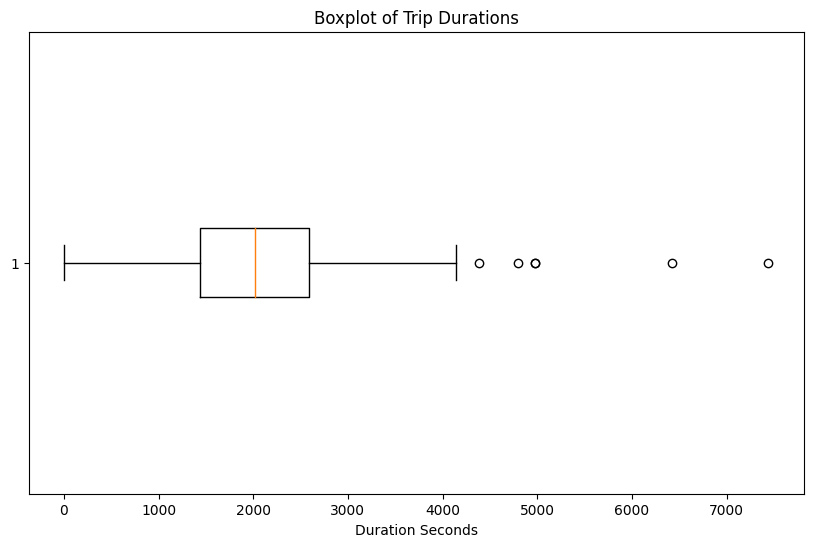

Removed 6 outliers


In [22]:
# Plotting a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(trips_weather_df['duration_seconds'].dropna(), vert=False)
plt.title('Boxplot of Trip Durations')
plt.xlabel('Duration Seconds')
plt.show()

# Identify outliers
Q1 = trips_weather_df['duration_seconds'].quantile(0.25)
Q3 = trips_weather_df['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
cleaned_data = trips_weather_df[
    (trips_weather_df['duration_seconds'] >= lower_bound) &
    (trips_weather_df['duration_seconds'] <= upper_bound)
]

print(f"Removed {len(trips_weather_df) - len(cleaned_data)} outliers")

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Great job checking outliers 👏 Fully agree with the solution.
    

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

<b>Testing the hypothesis:</b> 

<b>Null Hypothesis H0</b> = The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

<b>Alternative Hypothesis H1</b> = "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

</div>

In [23]:
# Test the hypotheses

# Extract duration arrays for each condition
bad_weather_durations = trips_weather_df[
    (trips_weather_df['weather_conditions'] == 'Bad') &
    (trips_weather_df['start_ts'].dt.dayofweek == 5)
]['duration_seconds']

good_weather_durations = trips_weather_df[
    (trips_weather_df['weather_conditions'] == 'Good') &
    (trips_weather_df['start_ts'].dt.dayofweek == 5)
]['duration_seconds']

# Perform t-test
results = st.ttest_ind(bad_weather_durations, good_weather_durations, equal_var=False)

alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 9.126383933880083e-08
We reject the null hypothesis


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
The null and alternative hypotheses are clearly defined.
    
A two-sample t-test is used, which is the correct statistical test for comparing two groups (e.g., ride durations on good vs. bad weather Saturdays).
    
The significance level is explicitly mentioned, which is an important step in hypothesis testing.

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

<b>General Conclusion:</b> 

For the first part of this project a SQL data extracting was permfored on different tables, joining them on their primiary keys to obtiain the data sets used for the python part of the project, performing data cleaning and anazlysis using bar charts, 2 of the most frequent destinations for rides are the Loop and O'Hare neighborhoods, Loop being the top 1 and O'Hare the top 5, finally with the last data set with the date, weather conditions and duration of rides in seconds I tested the Hypothesis that the average duration of rides doesn't change on riany saturdays setting the alpha value at 0.05, testing the result with the probability value, we reject this hypothesis meaning there is a significant change in average duration this may be caused by slow traffic due to riany conditions affecting driving and visibility on the roads. 

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Overall, your conclusions are insightful and actionable, providing Zuber with a comprehensive roadmap to optimize operations and enhance its competitive edge in Chicago. Great work!